## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset Using Pandas

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dateset Size

In [5]:
print("Number of Rows in Dataset: ",df.shape[0])
print("Number of Columns in Dataset: ",df.shape[1])

Number of Rows in Dataset:  32561
Number of Columns in Dataset:  15


## Statistic Summary

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Deleted Un-necessary Column

In [8]:
# Drop education and fnlwgt Variable
df=df.drop(['education'] , axis=1)
df=df.drop(['fnlwgt'] , axis=1)



this columns has not significant predictive power.

## Data Cleaning

1.   duplicate values (DUplicate Value = 24) have removed
2.   All the values are already in Integer form
3.   Apply Standardize for numerical feature

In [9]:
df.duplicated().sum()

3465

In [10]:
df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

Duplicated values have been deleted

## Converting String into integer data type

In [12]:
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [14]:
# Convert String Data types into Integer
df['workclass'] = df['workclass'].astype('category').cat.codes
df['marital.status'] = df['marital.status'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes
df['relationship'] = df['relationship'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df['native.country'] = df['native.country'].astype('category').cat.codes
df['income'] = df['income'].astype('category').cat.codes

## Standardize for numerical feature

In [15]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features for standardize
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Handling Missing Values

In [16]:
df.isnull().sum()

age               0
workclass         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There is no NULL values in this dataset

## Exploratory Data Analysis

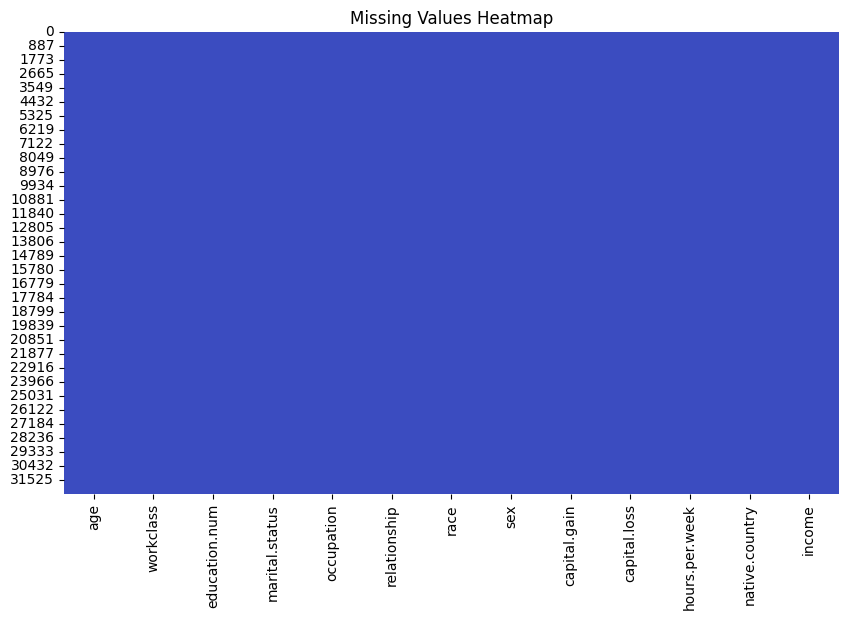

In [19]:
# Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

This heatmap shows there is no NULL value in DAtaset

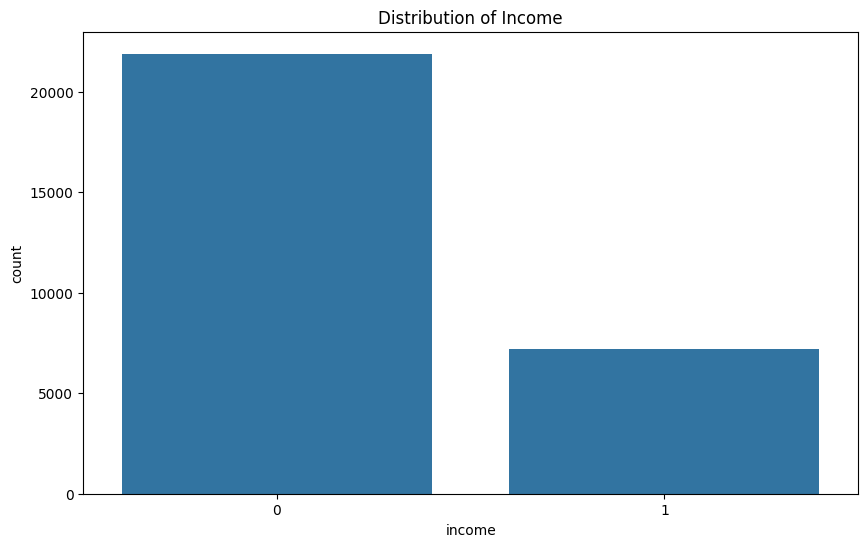

In [20]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

 This Barplot represents that people with low income( <=50k) is much more greater than people with salary (>50k). data is Imbalance.

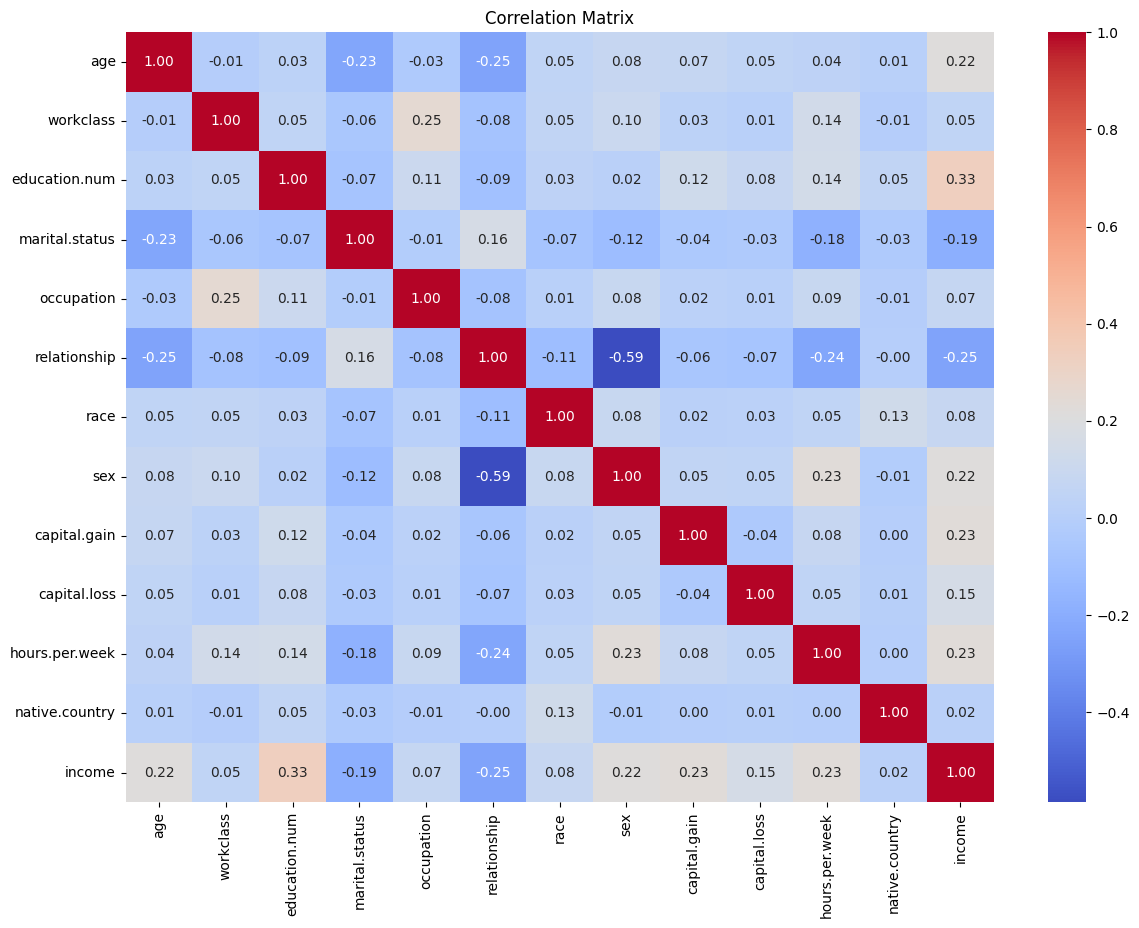

In [21]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*   Income positively correlates with capital.gain (higher income, higher capital gain) and hours.per.week (more hours worked, higher income).

*   Income has a negative correlation with education.num (might be due to factors outside this dataset).




## Detect and Handle Outliers Using IQR method

<ipython-input-24-e3ae8e8c79e6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~outliers]
<ipython-input-24-e3ae8e8c79e6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~outliers]
<ipython-input-24-e3ae8e8c79e6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~outliers]
<ipython-input-24-e3ae8e8c79e6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~outliers]


Number of outliers detected in each column:
age: 141
education.num: 216
capital.gain: 2698
capital.loss: 1511
hours.per.week: 8476
Visualizing outliers in the original dataset:


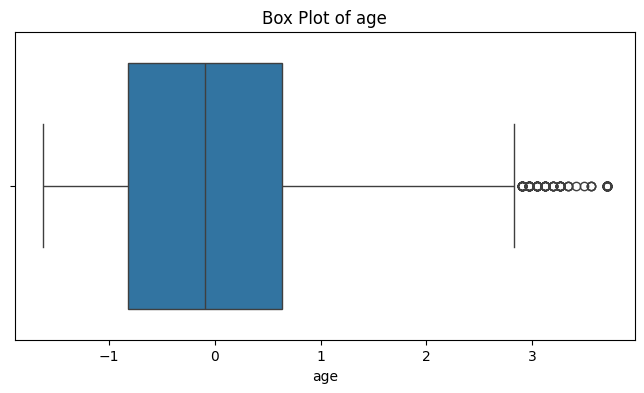

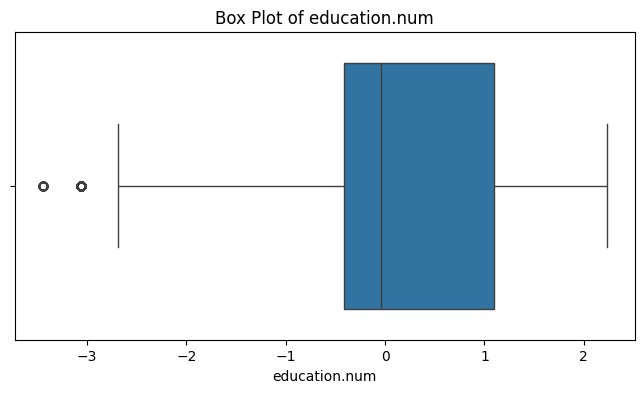

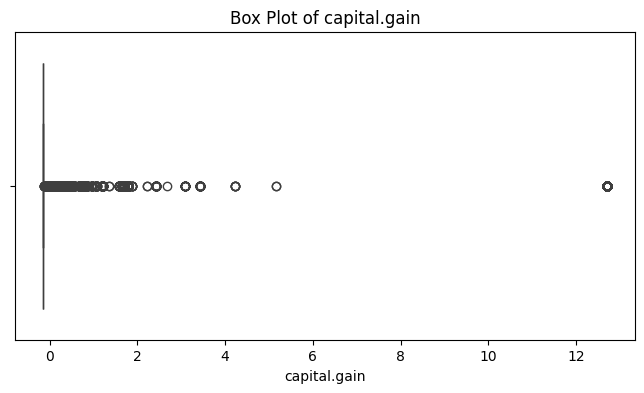

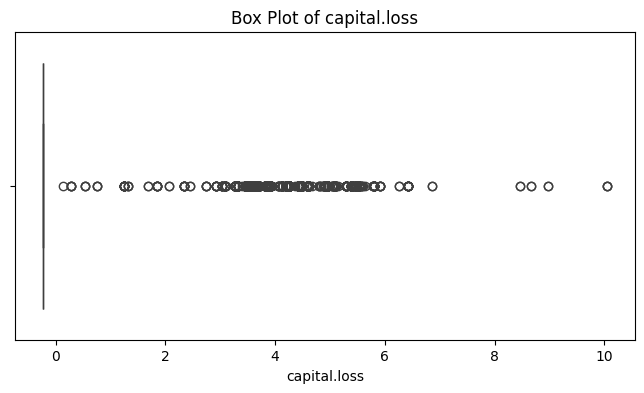

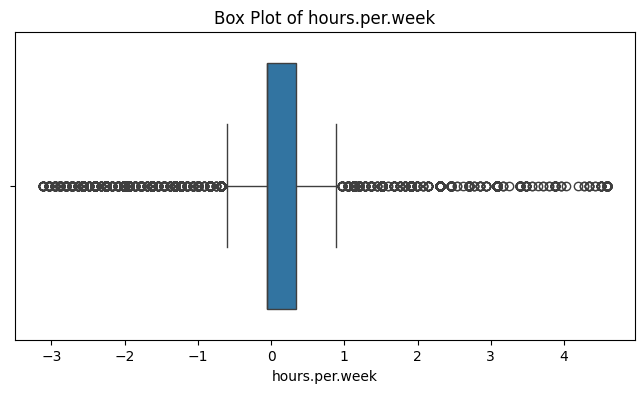

Visualizing outliers in the cleaned dataset:


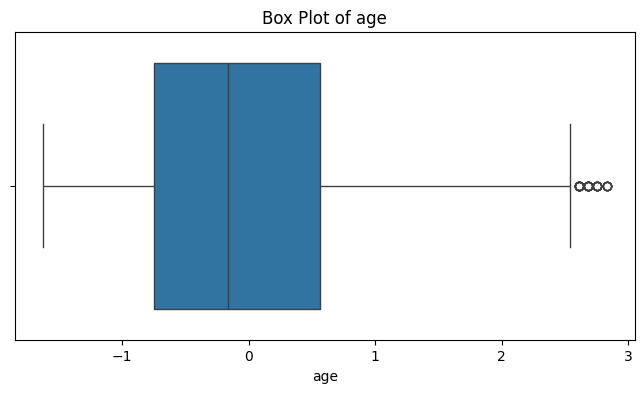

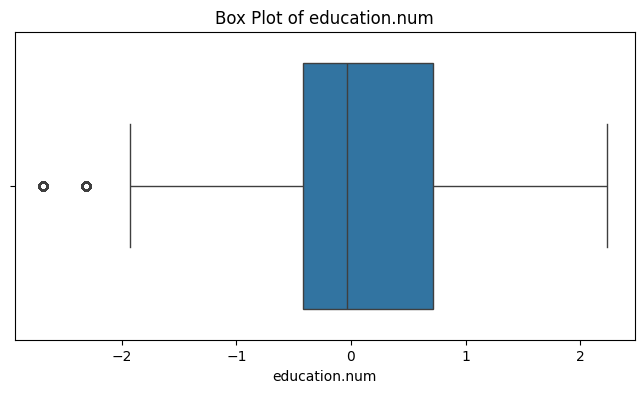

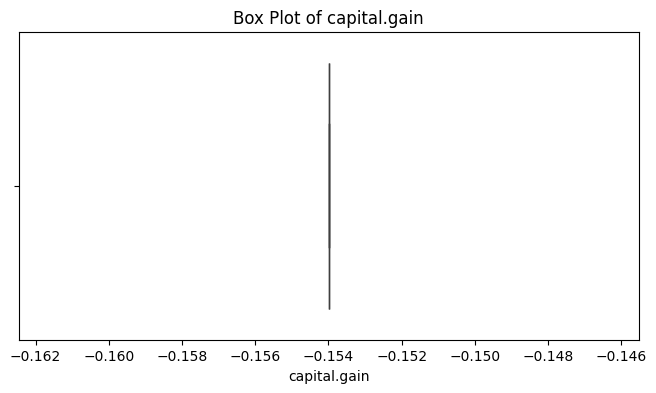

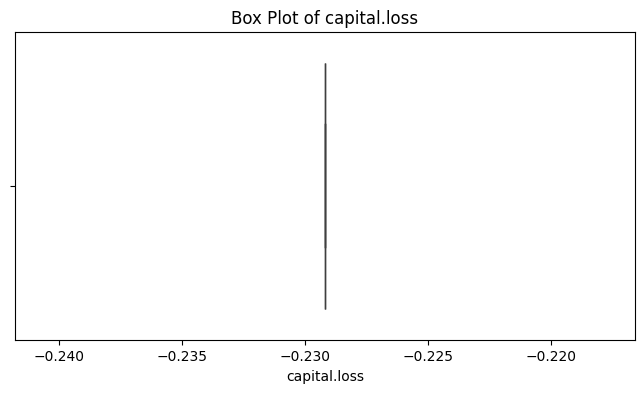

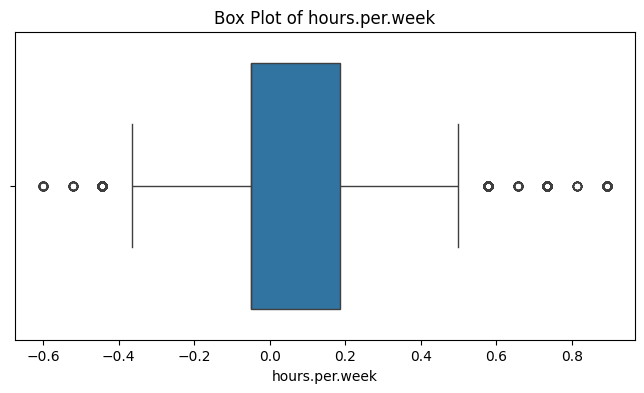

In [24]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    outliers_dict = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers_dict[col] = outliers
        df_cleaned = df_cleaned[~outliers]

    return df_cleaned, outliers_dict

# Function to visualize outliers using box plots for specified columns
def visualize_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Box Plot of {col}")
        plt.show()



# Specify columns to check for outliers
columns_to_check = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Detect and handle outliers using IQR method
df_cleaned_iqr, outliers_dict = detect_outliers_iqr(df, columns_to_check)
print(f"Number of outliers detected in each column:")
for col, outliers in outliers_dict.items():
    print(f"{col}: {outliers.sum()}")

# Visualize outliers in the original dataset
print("Visualizing outliers in the original dataset:")
visualize_outliers(df, columns_to_check)

# Visualize outliers in the cleaned dataset
print("Visualizing outliers in the cleaned dataset:")
visualize_outliers(df_cleaned_iqr, columns_to_check)


Number of outliers detected in each column:


*   age: 141
*   education.num: 216
*   capital.gain: 2698
*   capital.loss: 1511
*   hours.per.week: 8476


## Count Values in Targeted Column

In [25]:
df["income"].value_counts()

income
0    21886
1     7210
Name: count, dtype: int64

Our Targeted column has Imbalance Data. So we have to balance our data

In [27]:
X=df.drop("income",axis=1)
y=df["income"]

## Balancing the values

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
y_res.value_counts()

income
0    21886
1    21886
Name: count, dtype: int64

## Spliting The Dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Using KNN Models

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(X_test)

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score

## Precision Score

In [34]:
precision_score(y_test,y_pred)

0.6318289786223278

## Recall Score

In [35]:
recall_score(y_test,y_pred)

0.5753424657534246

## F1 Score

In [36]:
f1_score(y_test,y_pred)

0.6022641509433962

## Precision give the best accuracy : 90%